In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
train_data=pd.read_csv('./data/sensor_train/sensor_train.csv')
test_data=pd.read_csv('./data/sensor_test/sensor_test.csv')

In [6]:
train_data.head(5)

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
0,0,27,0.3,-0.3,0.1,0.6,4.5,8.8,0
1,0,108,0.1,-0.0,-0.4,0.4,4.7,8.4,0
2,0,198,0.1,0.0,0.3,0.9,4.6,9.0,0
3,0,297,0.1,-0.1,-0.5,0.8,4.7,7.2,0
4,0,388,0.1,0.2,0.6,0.9,4.7,8.9,0


In [7]:
test_data.head(5)

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg
0,0,71,0.2,1.0,0.6,0.2,5.3,9.2
1,0,150,0.0,1.0,-0.7,0.2,6.0,8.2
2,0,244,-0.2,0.8,-2.4,-0.4,5.3,7.6
3,0,326,2.3,-0.4,-1.6,2.5,4.5,3.4
4,0,409,-0.3,-1.4,3.3,0.2,3.5,12.4


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425359 entries, 0 to 425358
Data columns (total 9 columns):
fragment_id    425359 non-null int64
time_point     425359 non-null int64
acc_x          425359 non-null float64
acc_y          425359 non-null float64
acc_z          425359 non-null float64
acc_xg         425359 non-null float64
acc_yg         425359 non-null float64
acc_zg         425359 non-null float64
behavior_id    425359 non-null int64
dtypes: float64(6), int64(3)
memory usage: 29.2 MB


In [9]:
train_data.describe()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
count,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000
mean,3647.035972,2500.952026,0.009635,-0.063114,0.024548,0.965656,2.730190,7.825065,8.535035
std,2103.253140,1442.307956,0.619285,0.537614,0.717009,3.295531,2.978134,2.653261,5.395264
min,0.000000,0.000000,-14.700000,-14.700000,-12.600000,-19.800000,-16.900000,-8.900000,0.000000
25%,1822.000000,1252.000000,-0.100000,-0.100000,-0.200000,-0.700000,0.400000,7.300000,4.000000
50%,3646.000000,2501.000000,0.000000,0.000000,0.000000,0.200000,2.700000,8.700000,8.000000
75%,5466.000000,3749.000000,0.100000,0.100000,0.200000,2.000000,4.900000,9.400000,13.000000
max,7291.000000,4999.000000,34.500000,13.400000,28.200000,30.200000,14.400000,38.100000,18.000000


## 统计片段数

每个片段的平均时间长度、最大长度，最小长度。

In [21]:
train_data['fragment_id'].value_counts().describe()

count    7292.000000
mean       58.332282
std         1.668028
min        50.000000
25%        57.000000
50%        58.000000
75%        60.000000
max        61.000000
Name: fragment_id, dtype: float64

可以看到，共7292个片段，每个片段平均长度58.33，最小长度维50，最大长度维61,基本上片段都在55-60之间。

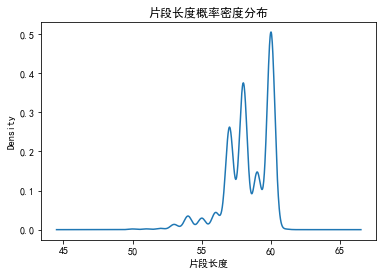

In [26]:
plt.rcParams['font.sans-serif']=['SimHei']
train_data['fragment_id'].value_counts().plot(kind='kde')
plt.title('片段长度概率密度分布')
plt.xlabel('片段长度')
plt.show()

## 统计每个行为的数目

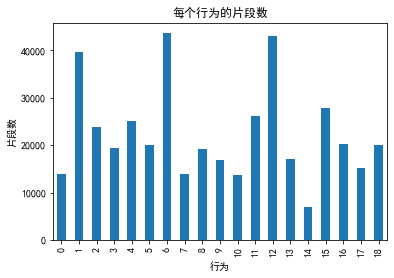

In [33]:
train_data.groupby('behavior_id')['fragment_id'].count().plot(kind='bar')
plt.title('每个行为的片段数')
plt.xlabel('行为')
plt.ylabel('片段数')
plt.show()

存在不均衡问题，有些行为样本较多。有些较少。

## 看看某一行为情况。

In [34]:
behavior_6=train_data[train_data.behavior_id==6] # 行为6的所有数据。

In [36]:
behavior_6.head(5)

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
141568,2436,33,0.2,-0.0,0.1,0.2,3.2,9.4,6
141569,2436,121,0.1,0.1,0.1,0.2,3.3,9.3,6
141570,2436,201,-0.0,0.0,-0.0,0.0,3.2,9.2,6
141571,2436,283,-0.1,-0.0,0.2,-0.1,3.1,9.4,6
141572,2436,366,-0.0,0.0,0.0,-0.0,3.1,9.2,6


In [37]:
behavior_6.describe()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
count,43646.000000,43646.000000,43646.000000,43646.000000,43646.000000,43646.000000,43646.000000,43646.00000,43646.0
mean,2805.533634,2498.770403,0.006498,-0.010892,-0.000119,-0.310546,3.589486,8.73887,6.0
std,214.020835,1442.771417,0.225016,0.159492,0.327772,0.846834,1.924268,1.06314,0.0
min,2436.000000,0.000000,-7.300000,-4.800000,-6.900000,-5.900000,-3.500000,1.80000,6.0
25%,2620.000000,1252.000000,-0.100000,-0.100000,-0.100000,-0.900000,2.100000,8.20000,6.0
50%,2807.000000,2501.000000,0.000000,0.000000,-0.000000,-0.200000,3.500000,9.10000,6.0
75%,2989.000000,3749.000000,0.100000,0.000000,0.100000,0.300000,5.100000,9.50000,6.0
max,3177.000000,4999.000000,5.100000,2.600000,8.000000,13.800000,8.900000,18.70000,6.0


In [38]:
behavior_14=train_data[train_data.behavior_id==14] # 行为14的所有数据。
behavior_14.head(5)

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
334931,5739,42,0.5,0.3,0.1,1.3,4.8,9.3,14
334932,5739,126,-0.0,-0.6,0.0,0.5,4.0,8.6,14
334933,5739,212,1.1,-0.3,-1.8,2.2,3.8,7.8,14
334934,5739,306,-0.8,-0.8,1.1,0.2,3.7,9.0,14
334935,5739,392,-0.7,0.1,-2.1,-0.1,4.5,7.8,14


In [39]:
behavior_14.describe()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.0
mean,5801.051692,2498.691262,-0.026540,-0.230081,0.059878,-0.357159,3.434485,8.924487,14.0
std,36.090605,1441.276440,0.655105,0.645454,0.859088,0.990088,1.233323,0.957568,0.0
min,5739.000000,0.000000,-3.900000,-3.900000,-5.900000,-17.000000,-0.700000,4.000000,14.0
25%,5770.000000,1250.000000,-0.400000,-0.700000,-0.400000,-1.000000,2.400000,8.400000,14.0
50%,5801.000000,2496.000000,-0.000000,-0.200000,-0.000000,-0.300000,3.600000,8.900000,14.0
75%,5832.000000,3744.000000,0.400000,0.200000,0.500000,0.300000,4.400000,9.500000,14.0
max,5864.000000,4998.000000,4.000000,2.400000,5.600000,6.000000,7.600000,13.800000,14.0


### 查看某一样本的数据情况

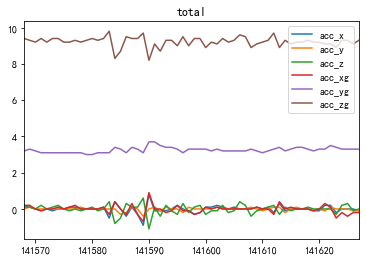

In [53]:
# 行为6的某以片段
behavior_6_2436=behavior_6[behavior_6.fragment_id==2436]
behavior_6_2436=behavior_6_2436.drop(['fragment_id','time_point','behavior_id'],axis=1)
behavior_6_2436.plot()
plt.title('total')
plt.show()

D:\Program Files\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


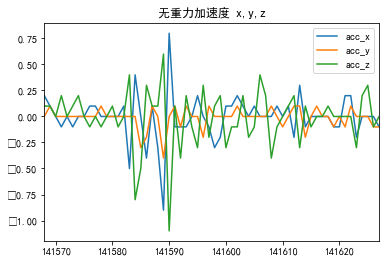

In [54]:
behavior_6_2436[['acc_x','acc_y','acc_z']].plot()
plt.title('无重力加速度 x,y,z')
plt.show()

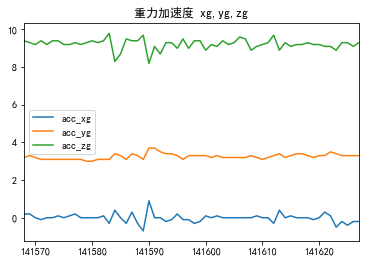

In [55]:
behavior_6_2436[['acc_xg','acc_yg','acc_zg']].plot()
plt.title('重力加速度 xg,yg,zg')
plt.show()

### 看看某一行为的均值

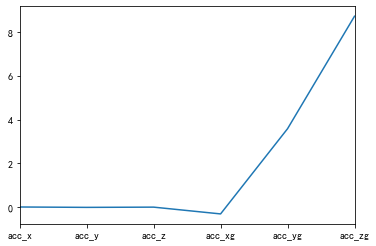

In [56]:
behavior_6.drop(['fragment_id','time_point','behavior_id'],axis=1).mean().plot()

D:\Program Files\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


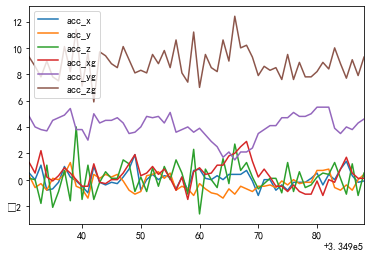

In [47]:
behavior_14_5739=behavior_14[behavior_14.fragment_id==5739]
behavior_14_5739=behavior_14_5739.drop(['fragment_id','time_point','behavior_id'],axis=1)
behavior_14_5739.plot()

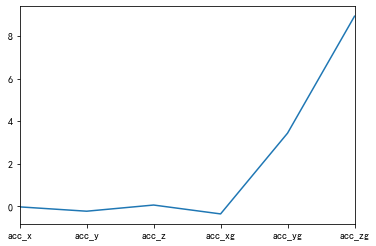

In [57]:
behavior_14.drop(['fragment_id','time_point','behavior_id'],axis=1).mean().plot()